In [4]:
from jupyter_core.paths import jupyter_config_dir, jupyter_data_dir
jupyter_config_dir()
os.path.join(jupyter_config_dir(), 'custom')
HOME = os.path.expanduser('~')
os.path.join(HOME, '.jupyter-themes')

'/home/kyle/.jupyter-themes'

In [1]:
from radd import lca, learn

In [141]:
a, b, c = threshold_network(Ii=6, wid=1.1, wdi=1.1, k=1., Id=6., si=1., g=13, tau=.02, dt=.005, dc=.005)


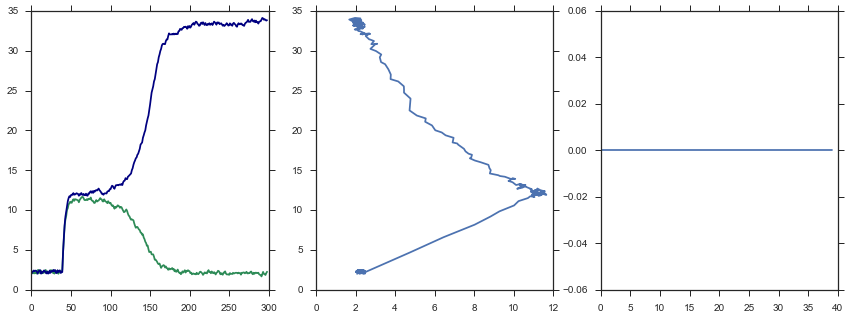

In [142]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16, 5), sharex=False)
ax1.plot(a, color='seagreen')
ax1.plot(b, color='navy')
ax2.plot(a, b)
ax3.plot(c)


In [7]:
def threshold_network(Id=4, Ii=3, Io=2, wdi=.22, wid=.22, k=.85, si=2.3, dt=.01, tau=.05, tmax=1.5, rmax=40, b=20, g=11, ntrials=10, y=1, Z=25, IoMax=4.5, wd=1., wi=1., dc=.03, ):

    timepoints = np.arange(0, tmax, dt)
    ntp=len(timepoints)

    rd = np.zeros(ntp)
    ri = np.zeros(ntp)
    dv = np.zeros(ntp)

    FX = lambda x, r: rmax/(1+np.exp(-(x-b)/g))-r
    dspace = lambda rd, ri: (rd-ri)/np.sqrt(2)

    Ed=si*np.sqrt(dt/tau)*rs(ntp)
    Ei=si*np.sqrt(dt/tau)*rs(ntp)
    x=40
    rd[:x], ri[:x] = [v[0][:x]+Io+v[1][:x] for v in [[rd,Ed],[ri,Ei]]]

    subZ=True
    IIi, IId = [deepcopy(ii) for ii in [Id, Ii]]
    for i in xrange(x, ntp):

        rd[i] = rd[i-1]+dt/tau*(FX(wd*Id + y*Io + k*rd[i-1] + -wid*ri[i-1], rd[i-1])) + Ed[i]
        ri[i] = ri[i-1]+dt/tau*(FX(wi*Ii + y*Io + k*ri[i-1] + -wdi*rd[i-1], ri[i-1])) + Ei[i]

        Id+=dc
        if dv[i-1]<Z and subZ:
              dv[i] = dspace(rd[i-1], ri[i-1])
        else:
              pass
              #break

    return rd[:i], ri[:i], dv[:dv[dv<Z].argmax()]
